In [1]:
import os
import struct
import pyspark.sql.functions as F
from pyspark.sql.functions import *

for i in range(2001,2019):
  path = os.path.join("/FileStore/tables/",'madrid_%s.csv' %str(i))
  df = spark.read.options(header='true').csv(path)
  print("Years = ", i, "Columns = ", df.columns)

Years = 2001 Columns = ['date', 'BEN', 'CO', 'EBE', 'MXY', 'NMHC', 'NO_2', 'NOx', 'OXY', 'O_3', 'PM10', 'PXY', 'SO_2', 'TCH', 'TOL', 'station']
Years = 2002 Columns = ['date', 'BEN', 'CO', 'EBE', 'MXY', 'NMHC', 'NO_2', 'NOx', 'OXY', 'O_3', 'PM10', 'PXY', 'SO_2', 'TCH', 'TOL', 'station']
Years = 2003 Columns = ['date', 'BEN', 'CO', 'EBE', 'MXY', 'NMHC', 'NO_2', 'NOx', 'OXY', 'O_3', 'PM10', 'PXY', 'SO_2', 'TCH', 'TOL', 'station']
Years = 2004 Columns = ['date', 'BEN', 'CO', 'EBE', 'MXY', 'NMHC', 'NO_2', 'NOx', 'OXY', 'O_3', 'PM10', 'PM25', 'PXY', 'SO_2', 'TCH', 'TOL', 'station']
Years = 2005 Columns = ['date', 'BEN', 'CO', 'EBE', 'MXY', 'NMHC', 'NO_2', 'NOx', 'OXY', 'O_3', 'PM10', 'PM25', 'PXY', 'SO_2', 'TCH', 'TOL', 'station']
Years = 2006 Columns = ['date', 'BEN', 'CO', 'EBE', 'MXY', 'NMHC', 'NO_2', 'NOx', 'OXY', 'O_3', 'PM10', 'PM25', 'PXY', 'SO_2', 'TCH', 'TOL', 'station']
Years = 2007 Columns = ['date', 'BEN', 'CO', 'EBE', 'MXY', 'NMHC', 'NO_2', 'NOx', 'OXY', 'O_3', 'PM10', 'PM25', 'PXY', 'SO_2', 'TCH', 'TOL', 'station']
Years = 2008 Columns = ['date', 'BEN', 'CO', 'EBE', 'MXY', 'NMHC', 'NO_2', 'NOx', 'OXY', 'O_3', 'PM10', 'PM25', 'PXY', 'SO_2', 'TCH', 'TOL', 'station']
Years = 2009 Columns = ['date', 'BEN', 'CO', 'EBE', 'MXY', 'NMHC', 'NO_2', 'NOx', 'OXY', 'O_3', 'PM10', 'PM25', 'PXY', 'SO_2', 'TCH', 'TOL', 'station']
Years = 2010 Columns = ['date', 'BEN', 'CO', 'EBE', 'MXY', 'NMHC', 'NO_2', 'NOx', 'OXY', 'O_3', 'PM10', 'PM25', 'PXY', 'SO_2', 'TCH', 'TOL', 'station']
Years = 2011 Columns = ['date', 'BEN', 'CO', 'EBE', 'NMHC', 'NO', 'NO_2', 'O_3', 'PM10', 'PM25', 'SO_2', 'TCH', 'TOL', 'station']
Years = 2012 Columns = ['date', 'BEN', 'CO', 'EBE', 'NMHC', 'NO', 'NO_2', 'O_3', 'PM10', 'PM25', 'SO_2', 'TCH', 'TOL', 'station']
Years = 2013 Columns = ['date', 'BEN', 'CO', 'EBE', 'NMHC', 'NO', 'NO_2', 'O_3', 'PM10', 'PM25', 'SO_2', 'TCH', 'TOL', 'station']
Years = 2014 Columns = ['date', 'BEN', 'CO', 'EBE', 'NMHC', 'NO', 'NO_2', 'O_3', 'PM10', 'PM25', 'SO_2', 'TCH', 'TOL', 'station']
Years = 2015 Columns = ['date', 'BEN', 'CO', 'EBE', 'NMHC', 'NO', 'NO_2', 'O_3', 'PM10', 'PM25', 'SO_2', 'TCH', 'TOL', 'station']
Years = 2016 Columns = ['date', 'BEN', 'CO', 'EBE', 'NMHC', 'NO', 'NO_2', 'O_3', 'PM10', 'PM25', 'SO_2', 'TCH', 'TOL', 'station']
Years = 2017 Columns = ['date', 'BEN', 'CH4', 'CO', 'EBE', 'NMHC', 'NO', 'NO_2', 'NOx', 'O_3', 'PM10', 'PM25', 'SO_2', 'TCH', 'TOL', 'station']
Years = 2018 Columns = ['date', 'BEN', 'CH4', 'CO', 'EBE', 'NMHC', 'NO', 'NO_2', 'NOx', 'O_3', 'PM10', 'PM25', 'SO_2', 'TCH', 'TOL', 'station']

In [2]:
def conbine2df(old, new):
  dataframes = [old, new]
# Create a list of all the column names and sort them
  cols = set()
  for df in dataframes:
      for x in df.columns:
          cols.add(x)
  cols = sorted(cols)
  
  # Create a dictionary with all the dataframes
  dfs = {}
  for i, d in enumerate(dataframes):
      new_name = 'df' + str(i)  # New name for the key, the dataframe is the value
      dfs[new_name] = d
      # Loop through all column names. Add the missing columns to the dataframe (with value 0)
      for x in cols:
          if x not in d.columns:
              dfs[new_name] = dfs[new_name].withColumn(x, lit(None))
      dfs[new_name] = dfs[new_name].select(cols)  # Use 'select' to get the columns sorted

  # Now put it al together with a loop (union)
  result = dfs['df0']      # Take the first dataframe, add the others to it
  dfs_to_add = list(dfs)  # List of all the dataframes in the dictionary
  dfs_to_add.remove('df0') # Remove the first one, because it is already in the result
  for x in dfs_to_add:
      result = result.union(dfs[x])
  return result

In [3]:
import os
import struct
import pyspark.sql.functions as F
from pyspark.sql.functions import *

df_2001_2003 = spark.read.options(header='true').csv("/FileStore/tables/madrid_2001.csv")
df_2001_2003 = df_2001_2003.na.drop()
for i in range(2002,2004):
  path = os.path.join("/FileStore/tables/",'madrid_%s.csv' %str(i))
  df = spark.read.options(header='true').csv(path)
  df = df.na.drop()
  df_2001_2003 = conbine2df(df, df_2001_2003)
columns_to_drop = ['date', 'station']
df_2001_2003 = df_2001_2003.drop(*columns_to_drop)
print((df_2001_2003.count(), len(df_2001_2003.columns)))
df_2001_2003.show(5)


(95060, 14)
+------------------+------------------+------------------+------------------+-------------------+------------------+------------------+------------------+-----------------+------------------+-----------------+------------------+------------------+------------------+
 BEN| CO| EBE| MXY| NMHC| NO_2| NOx| OXY| O_3| PM10| PXY| SO_2| TCH| TOL|
+------------------+------------------+------------------+------------------+-------------------+------------------+------------------+------------------+-----------------+------------------+-----------------+------------------+------------------+------------------+
 8.40999984741211| 1.940000057220459| 9.829999923706055|21.489999771118164|0.44999998807907104| 90.30000305175781| 384.8999938964844| 9.479999542236328|9.949999809265137| 95.1500015258789|7.940000057220459|29.270000457763672| 1.600000023841858| 38.56999969482422|
3.4600000381469727|1.2699999809265137| 3.430000066757202| 7.079999923706055|0.18000000715255737| 54.25| 173.3000030517578| 3.369999885559082|6.539999961853027| 53.0099983215332|2.619999885559082| 8.800000190734863| 1.5|14.600000381469727|
 6.389999866485596|1.7899999618530273| 5.75|10.880000114440918|0.33000001311302185| 75.45999908447266| 281.1000061035156| 3.680000066757202|6.690000057220459| 63.84000015258789|4.239999771118164|18.459999084472656|1.6799999475479126|23.510000228881836|
 7.420000076293945|1.4700000286102295|10.630000114440918|24.729999542236328| 0.3499999940395355| 83.30999755859375|277.20001220703125| 11.0|9.899999618530273|58.880001068115234|8.930000305175781|24.709999084472656| 1.5|37.630001068115234|
 3.619999885559082|1.2899999618530273| 3.200000047683716| 7.079999923706055| 0.1899999976158142|42.209999084472656| 166.3000030517578|3.4100000858306885|6.380000114440918|47.599998474121094|2.700000047683716| 8.40999984741211|1.5099999904632568|14.329999923706055|
+------------------+------------------+------------------+------------------+-------------------+------------------+------------------+------------------+-----------------+------------------+-----------------+------------------+------------------+------------------+
only showing top 5 rows

In [4]:
import h2o
h2o.init()
h2o.remove_all()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.
-------------------------- ---------------------------------------------------
H2O cluster uptime: 5 hours 50 mins
H2O cluster timezone: Etc/UTC
H2O data parsing timezone: UTC
H2O cluster version: 3.24.0.3
H2O cluster version age: 27 days
H2O cluster name: H2O_from_python_root_d1afq6
H2O cluster total nodes: 1
H2O cluster free memory: 13.01 Gb
H2O cluster total cores: 8
H2O cluster allowed cores: 8
H2O cluster status: locked, healthy
H2O connection url: http://localhost:54321
H2O connection proxy:
H2O internal security: False
H2O API Extensions: Amazon S3, XGBoost, Algos, AutoML, Core V3, Core V4
Python version: 3.6.5 final
-------------------------- ---------------------------------------------------

In [5]:
import pandas as pd
df_2001_2003_pd = df_2001_2003.toPandas()

In [6]:
hf_missing_by_function = h2o.H2OFrame(df_2001_2003_pd)
for i in range(len(df_2001_2003.columns)):
  hf_missing_by_function[:,i].insert_missing_values(0.1, seed = i)

Parse progress: |█████████████████████████████████████████████████████████| 100%
Insert Missing Values progress: |█████████████████████████████████████████| 100%
Insert Missing Values progress: |█████████████████████████████████████████| 100%
Insert Missing Values progress: |█████████████████████████████████████████| 100%
Insert Missing Values progress: |█████████████████████████████████████████| 100%
Insert Missing Values progress: |█████████████████████████████████████████| 100%
Insert Missing Values progress: |█████████████████████████████████████████| 100%
Insert Missing Values progress: |█████████████████████████████████████████| 100%
Insert Missing Values progress: |█████████████████████████████████████████| 100%
Insert Missing Values progress: |█████████████████████████████████████████| 100%
Insert Missing Values progress: |█████████████████████████████████████████| 100%
Insert Missing Values progress: |█████████████████████████████████████████| 100%
Insert Missing Values progress: |█████████████████████████████████████████| 100%
Insert Missing Values progress: |█████████████████████████████████████████| 100%
Insert Missing Values progress: |█████████████████████████████████████████| 100%

In [7]:
hf_missing_by_function.describe()

Rows:95060
Cols:14


 BEN CO EBE MXY NMHC NO_2 NOx OXY O_3 PM10 PXY SO_2 TCH TOL
------- ------------------ ------------------ ------------------ ------------------ ------------------- ------------------ ------------------ ------------------ ------------------- ------------------ ------------------ ------------------ ------------------- ------------------
type real real real real real real real real real real real real real real
mins 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.12999999523162842 0.4600000083446502 0.0 0.1899999976158142 0.7599999904632568 0.0
mean 2.6570224505861804 0.8456032903769884 3.0306156394237713 6.949425511756312 0.1614293728973868 61.13714027415761 135.54239232078336 3.1824022885436163 33.39739577146644 35.434966535694386 2.8181338225287798 14.205996558300164 1.4167900669942606 13.63008407823241
maxs 66.38999938964844 11.890000343322754 92.58999633789062 177.60000610351562 2.880000114440918 342.70001220703125 1940.0 89.51000213623047 178.6999969482422 273.70001220703125 106.0 180.3999938964844 6.210000038146973 219.1000061035156
sigma 2.5799842079781046 0.6890421079187603 3.1276851691915346 7.049219343913201 0.1551447889718445 32.68027078665763 123.81218088016149 3.1769713051922808 26.560945324458796 26.801610593820325 3.0130185531363134 12.418059944467611 0.24705019848941692 13.76710303523648
zeros 1 160 1 1 3572 4 4 1 0 0 1 0 0 1
missing 9493 9496 9523 9558 9505 9527 9515 9425 9572 9308 9409 9601 9675 9427
0 nan 1.940000057220459 9.829999923706056 21.489999771118164 0.44999998807907104 90.3000030517578 384.8999938964844 9.479999542236328 9.949999809265137 95.1500015258789 7.940000057220459 29.270000457763672 1.600000023841858 38.56999969482422
1 3.4600000381469727 1.2699999809265137 3.430000066757202 7.079999923706055 0.18000000715255737 54.25 173.3000030517578 3.369999885559082 6.539999961853027 53.0099983215332 nan nan 1.5 14.600000381469728
2 nan 1.7899999618530271 5.75 10.880000114440918 0.33000001311302185 75.45999908447266 281.1000061035156 3.680000066757202 6.690000057220459 63.84000015258789 nan nan 1.6799999475479126 23.510000228881836
3 nan 1.4700000286102295 10.630000114440918 24.729999542236328 0.3499999940395355 83.30999755859375 277.20001220703125 11.0 9.899999618530272 58.880001068115234 8.930000305175781 nan nan nan
4 3.619999885559082 1.2899999618530271 3.200000047683716 7.079999923706055 0.1899999976158142 42.209999084472656 166.3000030517578 3.4100000858306885 6.380000114440918 47.599998474121094 2.700000047683716 8.40999984741211 1.5099999904632568 14.329999923706056
5 5.559999942779541 1.5299999713897705 5.570000171661377 10.6899995803833 0.28999999165534973 65.87000274658203 228.6000061035156 3.9700000286102295 7.449999809265137 48.91999816894531 4.210000038146973 nan 1.6100000143051147 20.90999984741211
6 5.480000019073486 1.2899999618530271 8.899999618530273 21.1299991607666 0.3100000023841858 nan 241.0 9.880000114440918 9.720000267028809 54.369998931884766 7.769999980926514 22.700000762939453 nan 31.209999084472656
7 3.640000104904175 nan 3.180000066757202 6.980000019073486 0.10999999940395357 36.060001373291016 102.4000015258789 3.4200000762939453 nan 34.970001220703125 2.6700000762939453 6.449999809265137 1.440000057220459 13.920000076293944
8 4.269999980926514 1.2699999809265137 4.5 9.140000343322754 0.2300000041723251 59.439998626708984 188.8000030517578 3.680000066757202 nan 38.779998779296875 3.609999895095825 14.119999885559082 1.559999942779541 nan
9 5.300000190734863 nan 7.269999980926514 17.170000076293945 0.4300000071525574 77.86000061035156 351.20001220703125 8.270000457763672 9.920000076293944 66.8499984741211 6.420000076293945 24.979999542236328 1.6100000143051147 29.40999984741211

In [8]:
import pandas as pd
import numpy as np

n = df_2001_2003.count()
df_missing_pd = df_2001_2003_pd.copy()
import random
for i in range(len(df_2001_2003.columns)):
  np.random.seed(i)
  idx_list = random.sample(range(n), int(n/10.))
  df_missing_pd.iloc[idx_list,i] = np.nan

hf_2001_2003 = h2o.H2OFrame(df_2001_2003_pd)
hf_missing = h2o.H2OFrame(df_missing_pd)

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%

In [9]:
hf_2001_2003.show()
hf_missing.show()

BEN CO EBE MXY NMHC NO_2 NOx OXY O_3 PM10 PXY SO_2 TCH TOL
----- ---- ----- ----- ------ ------ ----- ----- ----- ------ ----- ------ ----- -----
 8.41 1.94 9.83 21.49 0.45 90.3 384.9 9.48 9.95 95.15 7.94 29.27 1.6 38.57
 3.46 1.27 3.43 7.08 0.18 54.25 173.3 3.37 6.54 53.01 2.62 8.8 1.5 14.6
 6.39 1.79 5.75 10.88 0.33 75.46 281.1 3.68 6.69 63.84 4.24 18.46 1.68 23.51
 7.42 1.47 10.63 24.73 0.35 83.31 277.2 11 9.9 58.88 8.93 24.71 1.5 37.63
 3.62 1.29 3.2 7.08 0.19 42.21 166.3 3.41 6.38 47.6 2.7 8.41 1.51 14.33
 5.56 1.53 5.57 10.69 0.29 65.87 228.6 3.97 7.45 48.92 4.21 16 1.61 20.91
 5.48 1.29 8.9 21.13 0.31 77.5 241 9.88 9.72 54.37 7.77 22.7 1.46 31.21
 3.64 0.93 3.18 6.98 0.11 36.06 102.4 3.42 5.97 34.97 2.67 6.45 1.44 13.92
 4.27 1.27 4.5 9.14 0.23 59.44 188.8 3.68 6.43 38.78 3.61 14.12 1.56 16.91
 5.3 1.87 7.27 17.17 0.43 77.86 351.2 8.27 9.92 66.85 6.42 24.98 1.61 29.41

[95060 rows x 14 columns]

 BEN CO EBE MXY NMHC NO_2 NOx OXY O_3 PM10 PXY SO_2 TCH TOL
------ ------ ------ ------ ------ ------ ----- ------ ----- ------ ----- ------ ------ ------
 8.41 1.94 9.83 21.49 0.45 90.3 384.9 9.48 9.95 95.15 7.94 29.27 1.6 38.57
 3.46 nan 3.43 7.08 0.18 54.25 173.3 nan 6.54 53.01 2.62 8.8 1.5 14.6
 6.39 nan 5.75 10.88 0.33 75.46 281.1 3.68 6.69 63.84 4.24 18.46 nan 23.51
 7.42 1.47 nan 24.73 0.35 83.31 277.2 11 9.9 58.88 8.93 24.71 1.5 37.63
 3.62 1.29 nan nan 0.19 42.21 166.3 3.41 6.38 47.6 2.7 8.41 1.51 14.33
nan 1.53 5.57 10.69 0.29 65.87 228.6 3.97 7.45 48.92 4.21 16 1.61 20.91
 5.48 1.29 8.9 21.13 0.31 77.5 241 9.88 9.72 54.37 7.77 22.7 1.46 31.21
 3.64 nan 3.18 6.98 0.11 36.06 102.4 3.42 5.97 34.97 2.67 6.45 1.44 13.92
 4.27 1.27 4.5 9.14 nan 59.44 188.8 nan 6.43 38.78 3.61 14.12 1.56 16.91
 5.3 1.87 7.27 17.17 0.43 77.86 351.2 nan 9.92 66.85 6.42 24.98 1.61 nan

[95060 rows x 14 columns]

In [10]:
hf_missing.describe()

Rows:95060
Cols:14


 BEN CO EBE MXY NMHC NO_2 NOx OXY O_3 PM10 PXY SO_2 TCH TOL
------- ------------------ ------------------ ------------------ ------------------ ------------------- ------------------ ------------------ ------------------ ------------------- ------------------ ------------------ ------------------ ------------------- ------------------
type real real real real real real real real real real real real real real
mins 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.12999999523162842 0.6800000071525574 0.0 0.1899999976158142 0.7599999904632568 0.0
mean 2.6530030157873297 0.8450496754942313 3.0272488715143457 6.942534656802579 0.16154919696912262 61.05066413048233 135.64750287902865 3.1823550035437407 33.42620426499052 35.41420541850386 2.8168304230048764 14.228519180254988 1.416852512590529 13.633123523448955
maxs 65.63999938964844 11.890000343322754 92.58999633789062 177.60000610351562 2.880000114440918 342.70001220703125 1940.0 89.51000213623047 178.6999969482422 273.70001220703125 106.0 180.3999938964844 6.210000038146973 242.8999938964844
sigma 2.565040222157473 0.6897675752268677 3.1190477544280784 7.031053320698588 0.15504878464974142 32.69345408889546 124.0533993265466 3.181069261562216 26.56213258608722 26.750383454840755 3.0003159819890186 12.44376720054195 0.24829893026915725 13.810503002696372
zeros 1 164 1 1 3601 4 4 1 0 0 1 0 0 1
missing 9506 9506 9506 9506 9506 9506 9506 9506 9506 9506 9506 9506 9506 9506
0 8.40999984741211 1.940000057220459 9.829999923706056 21.489999771118164 0.44999998807907104 90.3000030517578 384.8999938964844 9.479999542236328 9.949999809265137 95.1500015258789 7.940000057220459 29.270000457763672 1.600000023841858 38.56999969482422
1 3.4600000381469727 nan 3.430000066757202 7.079999923706055 0.18000000715255737 54.25 173.3000030517578 nan 6.539999961853027 53.0099983215332 2.619999885559082 8.800000190734863 1.5 14.600000381469728
2 6.389999866485596 nan 5.75 10.880000114440918 0.33000001311302185 75.45999908447266 281.1000061035156 3.680000066757202 6.690000057220459 63.84000015258789 4.239999771118164 18.459999084472656 nan 23.510000228881836
3 7.420000076293945 1.4700000286102295 nan 24.729999542236328 0.3499999940395355 83.30999755859375 277.20001220703125 11.0 9.899999618530272 58.880001068115234 8.930000305175781 24.709999084472656 1.5 37.630001068115234
4 3.619999885559082 1.2899999618530271 nan nan 0.1899999976158142 42.209999084472656 166.3000030517578 3.4100000858306885 6.380000114440918 47.599998474121094 2.700000047683716 8.40999984741211 1.5099999904632568 14.329999923706056
5 nan 1.5299999713897705 5.570000171661377 10.6899995803833 0.28999999165534973 65.87000274658203 228.6000061035156 3.9700000286102295 7.449999809265137 48.91999816894531 4.210000038146973 16.0 1.6100000143051147 20.90999984741211
6 5.480000019073486 1.2899999618530271 8.899999618530273 21.1299991607666 0.3100000023841858 77.5 241.0 9.880000114440918 9.720000267028809 54.369998931884766 7.769999980926514 22.700000762939453 1.4600000381469729 31.209999084472656
7 3.640000104904175 nan 3.180000066757202 6.980000019073486 0.10999999940395357 36.060001373291016 102.4000015258789 3.4200000762939453 5.96999979019165 34.970001220703125 2.6700000762939453 6.449999809265137 1.440000057220459 13.920000076293944
8 4.269999980926514 1.2699999809265137 4.5 9.140000343322754 nan 59.439998626708984 188.8000030517578 nan 6.429999828338623 38.779998779296875 3.609999895095825 14.119999885559082 1.559999942779541 16.90999984741211
9 5.300000190734863 1.8700000047683716 7.269999980926514 17.170000076293945 0.4300000071525574 77.86000061035156 351.20001220703125 nan 9.920000076293944 66.8499984741211 6.420000076293945 24.979999542236328 1.6100000143051147 nan

In [11]:
from h2o.estimators.glrm import H2OGeneralizedLowRankEstimator
model_1 = H2OGeneralizedLowRankEstimator(k=10, transform = "STANDARDIZE", init="plus_plus", loss="Quadratic", regularization_x="L2", regularization_y="L2", max_iterations=50, min_step_size=1e-6,impute_original=True)
model_1.train(training_frame=hf_missing)
model_1.show()

glrm Model Build progress: |██████████████████████████████████████████████| 100%
Model Details
=============
H2OGeneralizedLowRankEstimator : Generalized Low Rank Modeling
Model Key: GLRM_model_python_1559575555523_73


ModelMetricsGLRM: glrm
** Reported on train data. **

MSE: NaN
RMSE: NaN
Sum of Squared Error (Numeric): 84016991.83721207
Misclassification Error (Categorical): 0.0
Scoring History: 
 timestamp duration iterations step_size objective
--- ------------------- ---------- ------------ --------------------- -----------------
 2019-06-03 21:16:28 6.813 sec 0.0 0.6666666666666666 5778031.370002463
 2019-06-03 21:16:28 6.898 sec 1.0 0.4444444444444444 5778031.370002463
 2019-06-03 21:16:28 6.978 sec 2.0 0.2222222222222222 5778031.370002463
 2019-06-03 21:16:28 7.060 sec 3.0 0.07407407407407407 5778031.370002463
 2019-06-03 21:16:28 7.151 sec 4.0 0.018518518518518517 5778031.370002463
--- --- --- --- --- ---
 2019-06-03 21:16:32 10.916 sec 45.0 0.004237268320784174 75023.09680395175
 2019-06-03 21:16:32 11.005 sec 46.0 0.004449131736823383 69789.04993670755
 2019-06-03 21:16:32 11.105 sec 47.0 0.004671588323664553 66919.07056251861
 2019-06-03 21:16:32 11.200 sec 48.0 0.0049051677398477805 64961.08920626855
 2019-06-03 21:16:32 11.313 sec 49.0 0.00515042612684017 63470.29774120696

See the whole table with table.as_data_frame()

In [12]:
hf_predict = model_1.predict(hf_missing)
# hf_predict.show()

def find_missing(all_data, df_miss, name):
  k = h2o.as_list(all_data).values.reshape(-1)
  k1 = np.isnan(h2o.as_list(df_miss).values.reshape(-1))
  k=h2o.H2OFrame(k[k1])  # 選出那些missing的位置新值
  k.names=[name]
  return(k)

from h2o.model.regression import *

label = find_missing(hf_2001_2003, hf_missing, 'label')
predict = find_missing(hf_predict, hf_missing, 'predict')
prediction = predict.cbind(label)
print(prediction)
print("MSE:", h2o_mean_squared_error(predict[:,0], label[:,0]))
print("R2:", h2o_r2_score(label, predict))

glrm prediction progress: |███████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
 predict label
--------- -------
 0.90484 1.27
 2.79471 3.37
 1.63059 1.79
 1.78112 1.68
10.0313 10.63
 3.47277 3.2
 8.73961 7.08
 4.09844 5.56
 0.670225 0.93
 0.240906 0.23

[133084 rows x 2 columns]

MSE: 213.88132306200876
R2: 0.9161931980946235

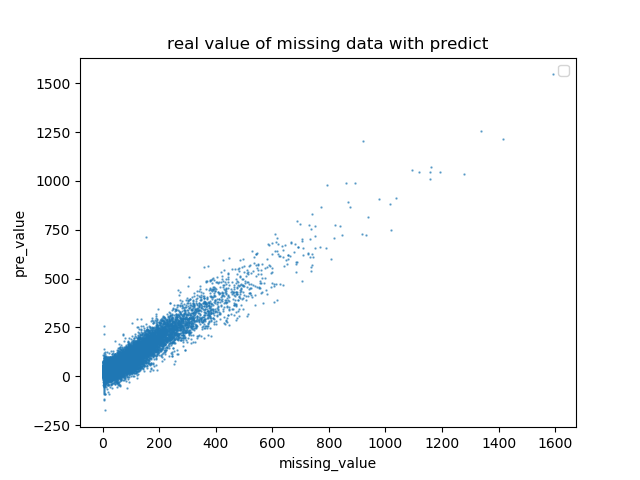

In [13]:
show = prediction.as_data_frame(use_pandas=True)
import pandas as pd
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(show['label'].values, show['predict'].values, alpha=0.6, s=0.5) #scatterplot
plt.xlabel("missing_value")
plt.ylabel("pre_value")
plt.legend(loc="best")
plt.title("real value of missing data with predict")
display(fig)

In [14]:
df_2001_2003_all = spark.read.options(header='true').csv("/FileStore/tables/madrid_2001.csv")
for i in range(2002,2004):
  path = os.path.join("/FileStore/tables/",'madrid_%s.csv' %str(i))
  df = spark.read.options(header='true').csv(path)
  df_2001_2003_all = conbine2df(df, df_2001_2003_all)
columns_to_drop = ['date', 'station']
df_2001_2003_all = df_2001_2003_all.drop(*columns_to_drop)
print((df_2001_2003_all.count(), len(df_2001_2003_all.columns)))
df_2001_2003_all=df_2001_2003_all.toPandas()
df_2001_2003_all.fillna(value=pd.np.nan, inplace=True)
hf_all = h2o.H2OFrame(df_2001_2003_all)
hf_all.describe()

(679152, 14)
ERROR:py4j.java_gateway:There was an exception while executing the Python Proxy on the Python Side.
Traceback (most recent call last):
 File "/databricks/spark/python/lib/py4j-0.10.7-src.zip/py4j/java_gateway.py", line 2381, in _call_proxy
 return_value = getattr(self.pool[obj_id], method)(*params)
 File "/local_disk0/tmp/1559575519000-0/PythonShell.py", line 928, in getNewDatasetInfosJson
 return self.shell.user_ns.get_new_dataframe_infos_json()
 File "/local_disk0/tmp/1559575519000-0/PythonShell.py", line 460, in get_new_dataframe_infos_json
 for idx, (df_name, df) in enumerate(self.new_dataframes.items()):
RuntimeError: OrderedDict mutated during iteration
Parse progress: |█████████████████████████████████████████████████████████| 100%
Rows:679152
Cols:14


 BEN CO EBE MXY NMHC NO_2 NOx OXY O_3 PM10 PXY SO_2 TCH TOL
------- ---------------- ------------------ ----------------- ------------------ ------------------- ------------------ ------------------ ------------------ ------------------ ------------------ ----------------- -------------------- ------------------ -----------------
type enum real enum enum enum real real enum real real enum real enum enum
mins 0.0 0.0 0.0 0.0 0.4600000083446502 0.009999999776482582
mean 0.7932998635944404 60.89238646636264 125.48063217391602 33.87597661305652 34.51617476677696 14.54750240931467
maxs 18.040000915527344 586.0999755859375 2537.0 215.3999938964844 290.29998779296875 199.1000061035156
sigma 0.7691330250262138 33.191026461628105 120.1491991900736 28.038528927239547 28.182991032005464 12.296870826642913
zeros 1949 6 6 6 0 0
missing 0 20834 0 0 0 3757 3766 0 11781 21367 0 3513 0 0
0 nan 1.7200000286102295 nan nan nan 73.9000015258789 316.29998779296875 nan 10.550000190734863 55.209999084472656 nan 24.299999237060547 nan nan
1 nan 1.4500000476837158 nan nan 0.25999999046325684 72.11000061035156 250.0 0.7300000190734863 6.71999979019165 52.38999938964844 nan 14.229999542236328 1.5499999523162842 nan
2 nan 1.5700000524520874 nan nan nan 80.55999755859375 224.1999969482422 nan 21.049999237060547 63.2400016784668 nan 17.8799991607666 nan nan
3 nan 2.450000047683716 nan nan nan 78.37000274658203 450.3999938964844 nan 4.21999979019165 67.83999633789062 nan 24.899999618530273 nan nan
4 nan 3.259999990463257 nan nan nan 96.25 479.1000061035156 nan 8.460000038146973 95.77999877929688 nan 18.75 nan nan
5 8.40999984741211 1.940000057220459 9.829999923706055 21.489999771118164 0.44999998807907104 90.3000030517578 384.8999938964844 9.479999542236328 9.949999809265137 95.1500015258789 7.940000057220459 29.270000457763672 1.600000023841858 38.56999969482422
6 nan 1.3799999952316284 nan nan 0.28999999165534973 89.58000183105469 230.0 nan 7.199999809265137 54.0 nan 23.709999084472656 1.4900000095367432 nan
7 nan 1.5800000429153442 nan nan 0.30000001192092896 93.63999938964844 334.6000061035156 nan 4.190000057220459 26.6200008392334 nan 17.739999771118164 1.5800000429153442 nan
8 nan nan nan nan nan nan nan nan nan nan nan nan nan nan
9 nan 1.919999957084656 nan nan nan 71.83999633789062 181.3999938964844 nan 5.329999923706055 39.36000061035156 nan 21.63999938964844 nan nan

In [15]:
given_types ={'BEN':'real','CO':'real','EBE':'real','MXY':'real','NMHC':'real','NO_2':'real','NOx':'real','OXY':'real','O_3':'real','PM10':'real','PXY':'real','SO_2':'real','TCH':'real','TOL':'real'}
hf_all = h2o.H2OFrame(df_2001_2003_all, column_types=given_types)
hf_all.describe()

Parse progress: |█████████████████████████████████████████████████████████| 100%
Rows:679152
Cols:14


 BEN CO EBE MXY NMHC NO_2 NOx OXY O_3 PM10 PXY SO_2 TCH TOL
------- ----------------- ------------------ ------------------ ------------------ ------------------- ------------------ ------------------ ------------------ ------------------ ------------------ ------------------ -------------------- ------------------- ------------------
type real real real real real real real real real real real real real real
mins 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.4600000083446502 0.0 0.009999999776482582 0.1599999964237213 0.0
mean 2.581386207824226 0.7932998635944404 2.7578531393276013 6.242141480968833 0.1732883057995222 60.89238646636264 125.48063217391602 2.807127976049601 33.87597661305652 34.51617476677696 2.571085016477991 14.54750240931467 1.444724870550577 11.907861810575247
maxs 66.38999938964844 18.040000915527344 162.1999969482422 177.60000610351562 4.980000019073486 586.0999755859375 2537.0 103.0 215.3999938964844 290.29998779296875 106.0 199.1000061035156 6.320000171661377 242.8999938964844
sigma 3.012069349819225 0.7691330250262138 3.1917387012305207 6.878255889944335 0.17126944996481594 33.191026461628105 120.1491991900736 3.2683043190333425 28.038528927239547 28.182991032005464 2.9138164039668943 12.296870826642913 0.26881285140334976 13.026110597938137
zeros 1 1949 1 1 8625 6 6 1 6 0 1 0 0 1
missing 472271 20834 501609 553099 394437 3757 3766 552910 11781 21367 552988 3513 394249 472898
0 nan 1.7200000286102295 nan nan nan 73.9000015258789 316.29998779296875 nan 10.550000190734863 55.209999084472656 nan 24.299999237060547 nan nan
1 nan 1.4500000476837158 nan nan 0.25999999046325684 72.11000061035156 250.0 0.7300000190734863 6.71999979019165 52.38999938964844 nan 14.229999542236328 1.5499999523162842 nan
2 nan 1.5700000524520874 nan nan nan 80.55999755859375 224.1999969482422 nan 21.049999237060547 63.2400016784668 nan 17.8799991607666 nan nan
3 nan 2.450000047683716 nan nan nan 78.37000274658203 450.3999938964844 nan 4.21999979019165 67.83999633789062 nan 24.899999618530273 nan nan
4 nan 3.259999990463257 nan nan nan 96.25 479.1000061035156 nan 8.460000038146973 95.77999877929688 nan 18.75 nan nan
5 8.40999984741211 1.940000057220459 9.829999923706056 21.489999771118164 0.44999998807907104 90.3000030517578 384.8999938964844 9.479999542236328 9.949999809265137 95.1500015258789 7.940000057220459 29.270000457763672 1.600000023841858 38.56999969482422
6 nan 1.3799999952316284 nan nan 0.28999999165534973 89.58000183105469 230.0 nan 7.199999809265137 54.0 nan 23.709999084472656 1.4900000095367432 nan
7 nan 1.5800000429153442 nan nan 0.30000001192092896 93.63999938964844 334.6000061035156 nan 4.190000057220459 26.6200008392334 nan 17.739999771118164 1.5800000429153442 nan
8 nan nan nan nan nan nan nan nan nan nan nan nan nan nan
9 nan 1.919999957084656 nan nan nan 71.83999633789062 181.3999938964844 nan 5.329999923706055 39.36000061035156 nan 21.63999938964844 nan nan

In [16]:
hf_all_predict = model_1.predict(hf_all)

glrm prediction progress: |███████████████████████████████████████████████| 100%

In [17]:
hf_all_predict = hf_all_predict.as_data_frame(use_pandas=True)
hf_all = hf_all.as_data_frame(use_pandas=True)

In [18]:
hf_all_predict.head()

Out[17]: 
 reconstr_BEN reconstr_CO ... reconstr_TCH reconstr_TOL
0 14.871348 1.638931 ... 1.984641 148.620780
1 13.153176 1.303795 ... 1.292092 112.591452
2 -24.271660 1.651820 ... 2.499939 -152.156499
3 7.448131 2.722767 ... 1.633151 -9.353156
4 18.068386 3.005149 ... 2.060223 153.798010

[5 rows x 14 columns]

In [19]:
hf_all.head()

Out[18]: 
 BEN CO EBE MXY NMHC ... PM10 PXY SO_2 TCH TOL
0 NaN 1.72 NaN NaN NaN ... 55.209999 NaN 24.299999 NaN NaN
1 NaN 1.45 NaN NaN 0.26 ... 52.389999 NaN 14.230000 1.55 NaN
2 NaN 1.57 NaN NaN NaN ... 63.240002 NaN 17.879999 NaN NaN
3 NaN 2.45 NaN NaN NaN ... 67.839996 NaN 24.900000 NaN NaN
4 NaN 3.26 NaN NaN NaN ... 95.779999 NaN 18.750000 NaN NaN

[5 rows x 14 columns]

In [20]:
hf_all[hf_all.isnull()] = hf_all_predict.values
print(hf_all)

BEN CO ... TCH TOL
0 14.871348 1.720000 ... 1.984641 148.620780
1 13.153176 1.450000 ... 1.550000 112.591452
2 -24.271660 1.570000 ... 2.499939 -152.156499
3 7.448131 2.450000 ... 1.633151 -9.353156
4 18.068386 3.260000 ... 2.060223 153.798010
5 8.410000 1.940000 ... 1.600000 38.570000
6 14.294153 1.380000 ... 1.490000 120.305082
7 0.425022 1.580000 ... 1.580000 16.097257
8 5.928371 -6.482529 ... -2.079138 108.989225
9 28.389403 1.920000 ... 0.763445 215.113999
10 15.198524 1.330000 ... 1.800000 119.662176
11 -8.381973 2.180000 ... 2.659169 -76.410493
12 -4.443877 1.140000 ... 1.620000 -25.829356
13 -5.453043 4.680000 ... 3.581642 -115.429274
14 6.970000 1.440000 ... 1.860000 32.299999
15 -7.350760 1.250000 ... 2.334651 -13.051732
16 -11.563627 1.640000 ... 3.536316 -119.051314
17 -8.851091 1.850000 ... 1.850000 -47.399343
18 -9.429507 1.740000 ... 2.581548 -77.686821
19 0.811453 1.540000 ... 1.266664 -28.297347
20 -20.559987 1.730000 ... 2.374827 -72.263367
21 11.070000 1.750000 ... 1.951236 38.020000
22 3.210000 1.320000 ... 1.820000 15.180000
23 3.460000 1.270000 ... 1.500000 14.600000
24 5.230000 0.960000 ... 1.524168 24.910000
25 -17.347830 1.551506 ... 1.960000 -119.962071
26 -17.123736 0.351526 ... 1.500000 -37.195064
27 6.390000 1.790000 ... 1.680000 23.510000
28 -9.752925 2.100000 ... 2.138456 -34.356095
29 4.994219 1.380000 ... 1.620000 43.179632
... ... ... ... ... ...
679122 1.513194 1.840000 ... 2.539576 -47.236568
679123 9.660000 2.300000 ... 1.712190 28.040001
679124 18.780001 3.330000 ... 2.040000 44.139999
679125 0.490000 1.000000 ... 1.370000 1.550000
679126 6.370000 1.990000 ... 1.019089 22.010000
679127 9.790000 2.650000 ... 1.710000 25.520000
679128 24.379309 1.410000 ... 0.004507 87.190006
679129 5.860000 1.220000 ... 1.460000 27.910000
679130 5.884728 3.050000 ... 1.800095 -38.179564
679131 -1.188142 1.960000 ... 0.568860 -50.491565
679132 -6.320092 0.950000 ... 2.067149 -136.824450
679133 14.470000 1.830000 ... 1.530000 59.189999
679134 12.640000 1.450000 ... 1.780826 1.120000
679135 23.371250 3.800000 ... 0.891716 126.401873
679136 10.424086 2.640000 ... 1.241689 0.147164
679137 4.753033 0.620000 ... 1.027237 20.865642
679138 -4.311388 0.770000 ... 1.290000 16.796773
679139 0.595982 1.140000 ... 1.831574 20.805092
679140 -1.093381 2.600000 ... 1.006967 -67.714733
679141 9.970000 0.950000 ... 1.460000 23.190001
679142 -34.754113 0.780000 ... 2.238337 -271.409255
679143 -10.561057 3.390000 ... 3.118990 -157.587085
679144 45.167908 1.680000 ... 1.176231 396.080114
679145 25.240428 1.240000 ... 0.332542 69.891076
679146 -20.748022 1.100000 ... 1.147631 -145.532608
679147 10.450000 1.810000 ... 1.177202 28.350000
679148 5.200000 0.690000 ... 1.320000 16.080000
679149 0.490000 1.090000 ... 1.400000 1.550000
679150 5.620000 1.010000 ... 0.755644 20.750000
679151 8.090000 1.620000 ... 1.410000 22.270000

[679152 rows x 14 columns]